<a href="https://colab.research.google.com/github/CarlosSotero/biblioteca_pandas/blob/main/Case_2_Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

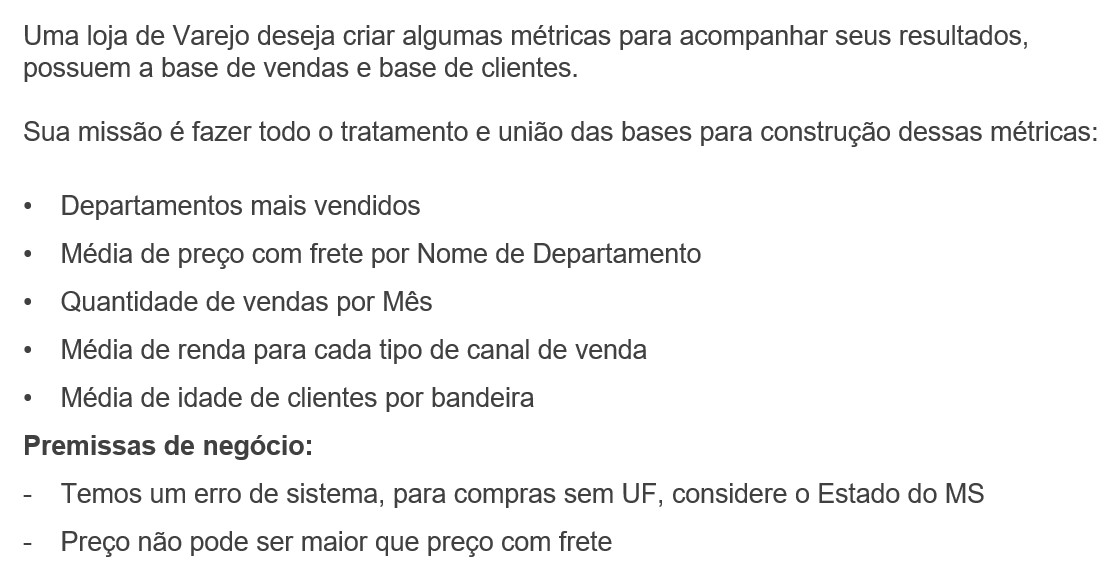

Importando as bibliotecas e analisando o database

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
vendas = pd.read_excel('/content/varejo.xlsx')
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [5]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


Utilizando a função .nunique() para identificar valores únicos dentro da coluna

In [6]:
vendas.groupby('idcanalvenda').idcompra.nunique().reset_index()

,idcanalvenda,idcompra
0,APP,139
1,Aplicativo,21425
2,Internet,24515
3,Mobile,24732


Unindo as linhas app e aplicativos, porque é a mesma coisa

In [7]:
vendas['idcanalvenda'] = vendas['idcanalvenda'].str.replace('APP', 'Aplicativo')
vendas.groupby('idcanalvenda').idcompra.nunique().reset_index()

,idcanalvenda,idcompra
0,Aplicativo,21539
1,Internet,24515
2,Mobile,24732


In [8]:
vendas.groupby('Nome_Departamento').idcompra.nunique().reset_index()

,Nome_Departamento,idcompra
0,Acessorios e Inovacoes,3548
1,Alimentos,2
2,Ar e Ventilacao,951
3,Audio,1794
4,Automotivo,895
5,Bebes,4531
6,Beleza e Saude,4626
7,Brinquedos,1320
8,"Cama, Mesa e Banho",153
9,Casa e Construcao,263


In [9]:
vendas.groupby('estado').idcompra.nunique()

,idcompra
estado,
AC,10
AL,461
AM,15
AP,3
BA,2028
CE,1007
DF,1902
ES,1254
GO,1603


Tirando os espaços entre as palavras na coluna Nome_Departamento

In [10]:
vendas['Nome_Departamento'] = vendas['Nome_Departamento'].str.replace(' ', '_')
vendas.groupby('Nome_Departamento').idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios_e_Inovacoes,3548
Alimentos,2
Ar_e_Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza_e_Saude,4626
Brinquedos,1320
"Cama,_Mesa_e_Banho",153


Tratando os dados nulos

In [11]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [12]:
vendas[vendas['estado'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


Delentando os valores nulos

Porém nao será usado, pq a premissa é que para todos os estados que estejam vazios, é pra considerar que seja do MS.

In [13]:
vendas_sem_nulos = vendas.dropna()


In [14]:
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


Preenchendo os campos nulos do Estado com MS

In [15]:
# O inplace = True funciona com se fizesse --> vendas['estado'] = vendas['estado'].fillna('MS')

vendas['estado'].fillna('MS', inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


<ipython-input-15-1aa135fe0a7e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas['estado'].fillna('MS', inplace=True)


Tratando valores nulos da coluna Preço.
Iremos utilizar a média de preços para preencher os valores vazios.

In [16]:
media_preco = vendas['Preço'].mean()
print(f'Média de preço: R${media_preco:.2f}')
vendas['Preço'].fillna(media_preco, inplace=True)
vendas.info()



Média de preço: R$906.59
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


<ipython-input-16-78823febb288>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas['Preço'].fillna(media_preco, inplace=True)


Tratando o Preço maior que o Preço com Frete

In [17]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790


In [18]:
vendas[['Preço', 'Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [19]:
preco_errado = vendas.query('Preço > Preço_com_frete')
vendas_correto = vendas.query('Preço < Preço_com_frete')

In [20]:
vendas_correto[['idcompra', 'Preço',  'Preço_com_frete', 'cliente_Log']].describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047.000000,22047.000000,22047.000000
mean,253799.955550,549.518401,567.332688,13856.313013
std,144794.628563,846.295127,863.458763,8049.120135
min,25.000000,8.720000,9.512000,1.000000
25%,127670.000000,93.528000,100.800000,6858.000000
50%,257885.000000,183.200000,193.912000,13845.000000
75%,379705.000000,661.680000,676.736000,20801.000000
max,499960.000000,14391.200000,14407.120000,27982.000000


In [21]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


Vizualizando apenas vendas da categoria Esporte e Lazer do estado de SP.

In [22]:
vendas_correto[['idcompra', 'Preço',  'Preço_com_frete', 'cliente_Log', 'Nome_Departamento', 'estado']].query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,168.000000,168.000000,168.00000,168.000000
mean,265130.744048,1070.083095,1098.71319,14368.571429
std,140435.252208,617.138494,620.66244,7890.233136
min,2145.000000,10.896000,16.11200,210.000000
25%,157955.000000,527.200000,545.32000,7717.500000
50%,253702.500000,1108.008000,1136.24800,15281.000000
75%,380616.250000,1599.200000,1618.88400,20538.000000
max,496910.000000,2399.200000,2432.74400,27837.000000


**1ª Premissa - Departamentos mais vendidos**

Do maior pro menor

In [23]:
vendas_correto.groupby('Nome_Departamento').idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


**2ª Premissa - Média de preço com frete por nome do departamento**

In [24]:
# Função round(,2) para os números ficarem com apenas duas casas decimais

round(vendas_correto.groupby('Nome_Departamento')['Preço_com_frete'].agg('mean').sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


Text(0.5, 1.0, 'Preço médio por departamento')

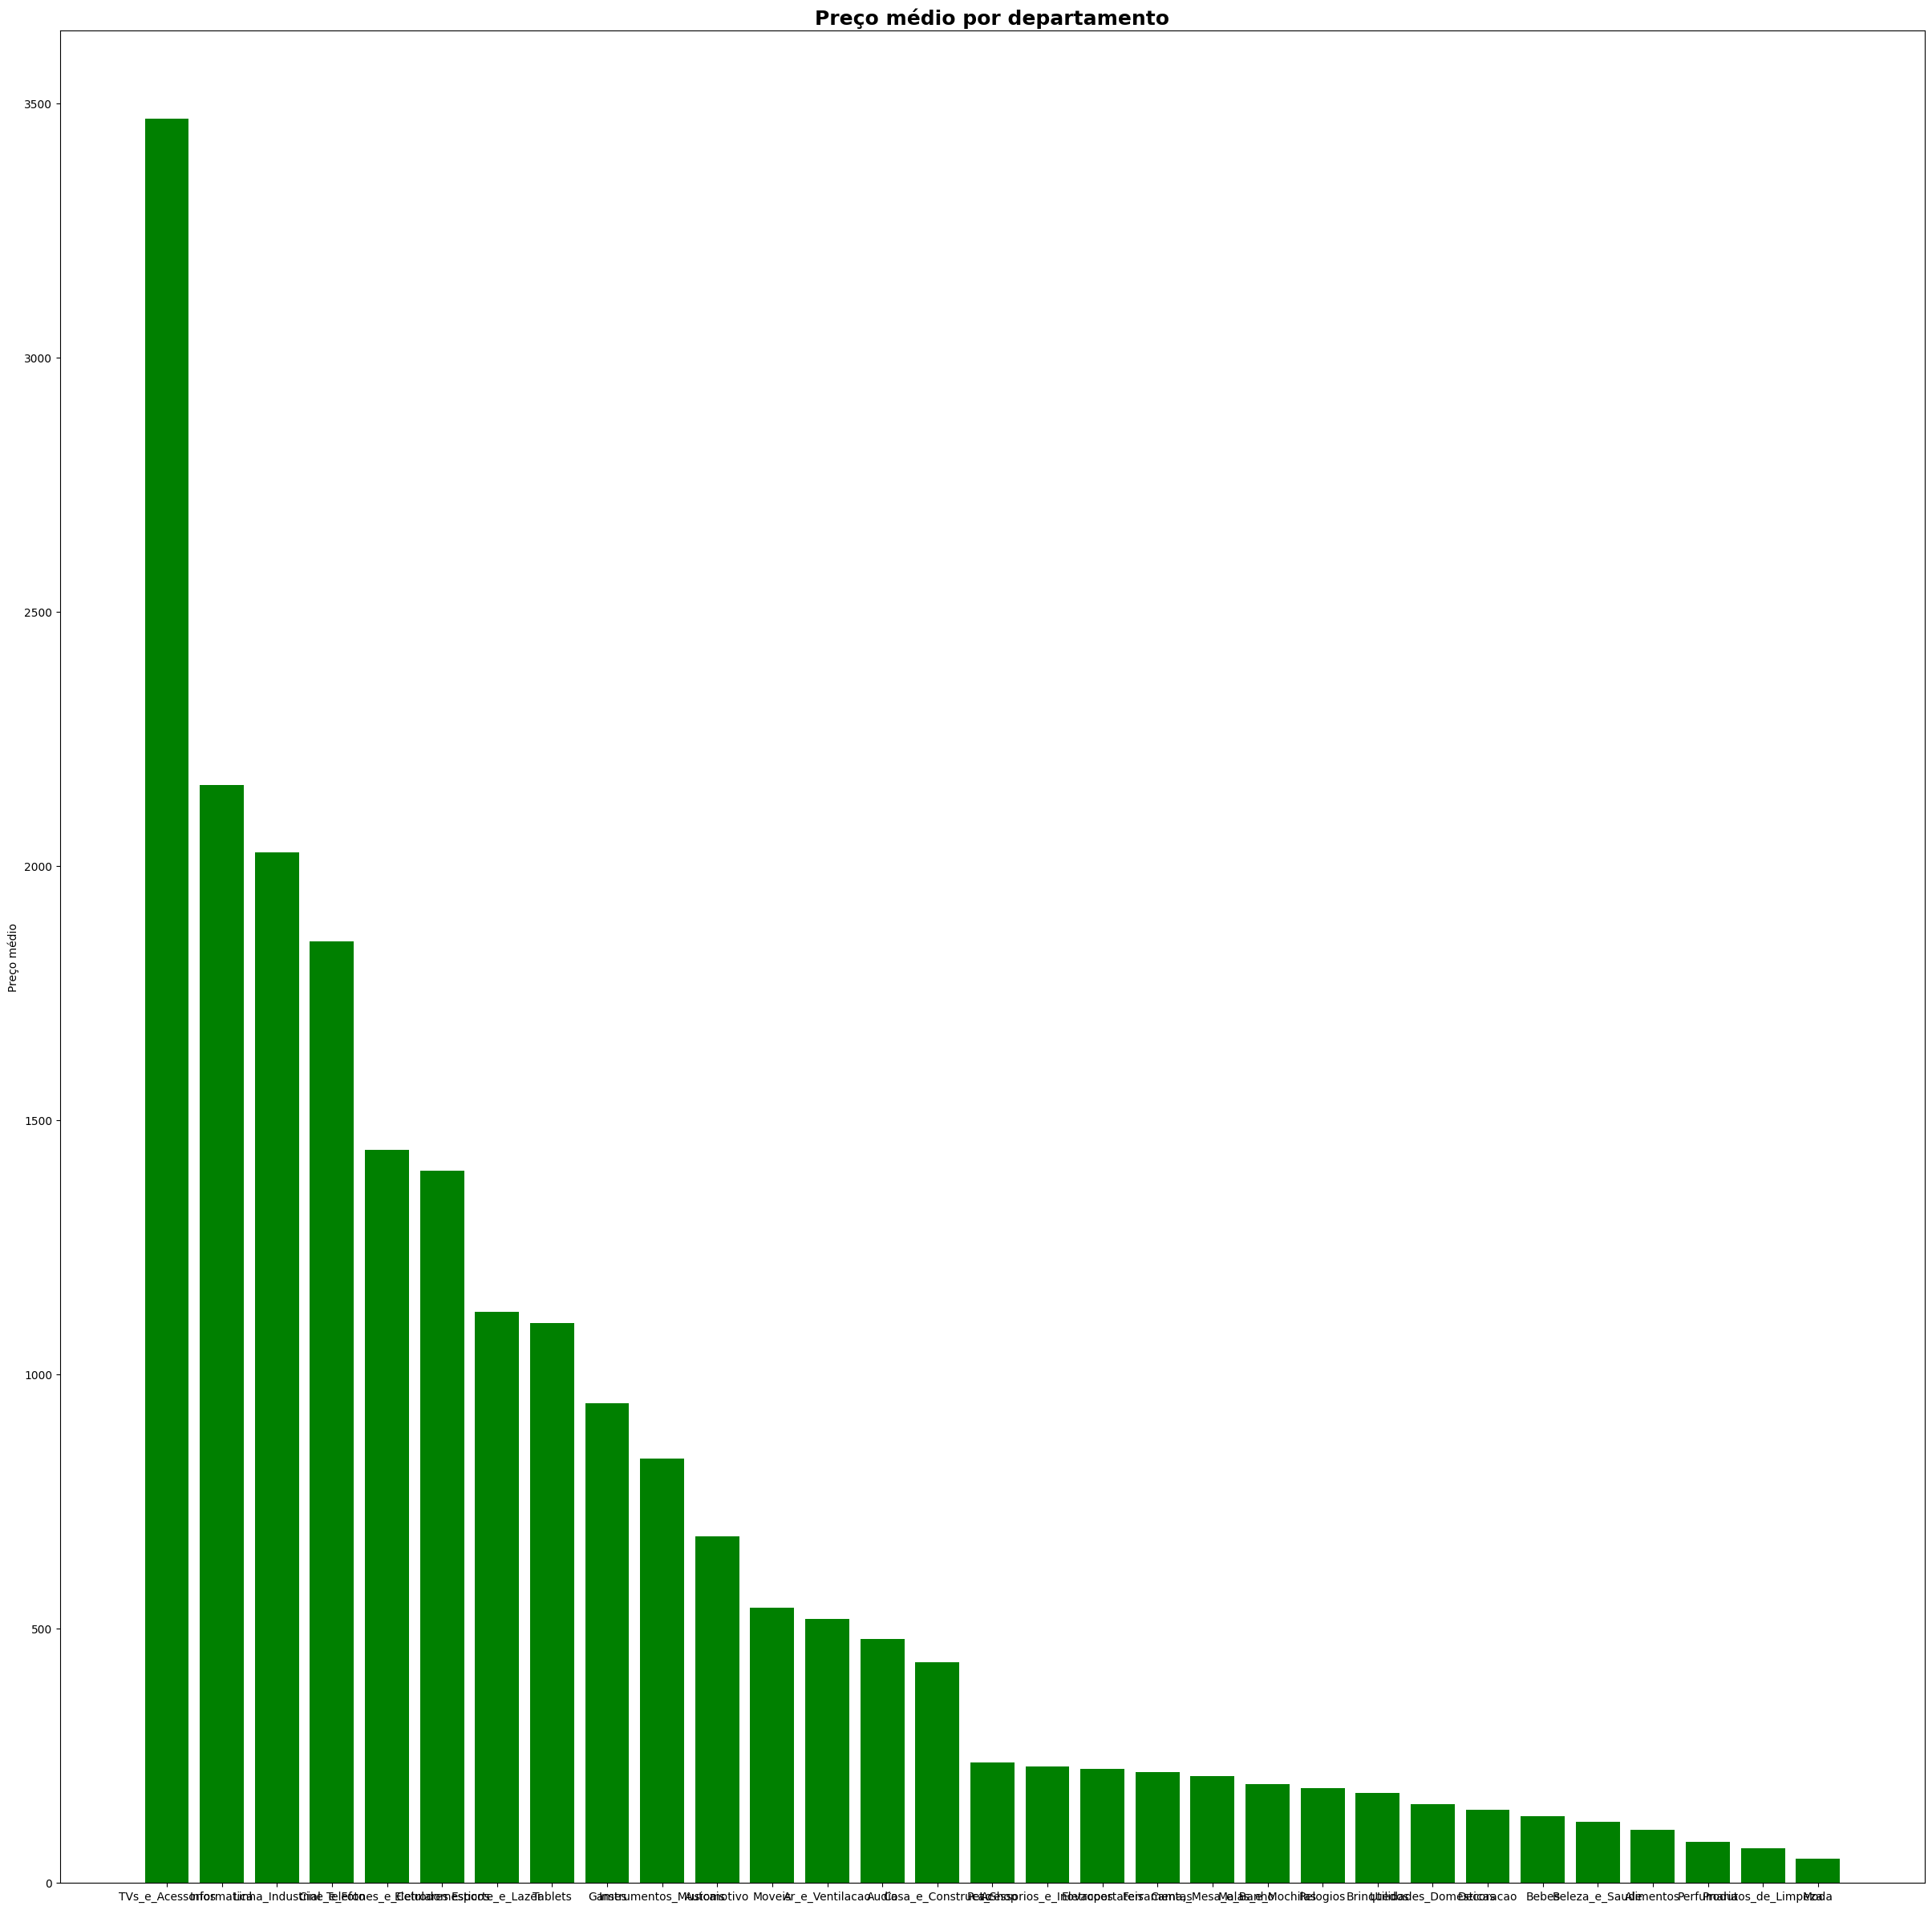

In [25]:
agg_dept_preco = round(vendas_correto.groupby('Nome_Departamento')['Preço_com_frete'].agg('mean').sort_values(ascending=False).reset_index(),2)

fig = plt.figure(figsize=(30,30))
plt.bar(agg_dept_preco['Nome_Departamento'], agg_dept_preco['Preço_com_frete'], color='green')
plt.ylabel('Preço médio')
plt.title('Preço médio por departamento', loc='center', fontsize=18, fontweight='bold', color='black')

**3ª Premissa - Quantidade de vendas por mês**

In [26]:
vendas_correto.groupby('Data').idcompra.nunique().sort_values(ascending=False)

,idcompra
Data,
2023-02-13,226
2023-01-20,218
2023-03-07,215
2023-03-30,214
2023-02-20,214
...,...
2023-02-15,162
2023-04-04,162
2023-02-25,161


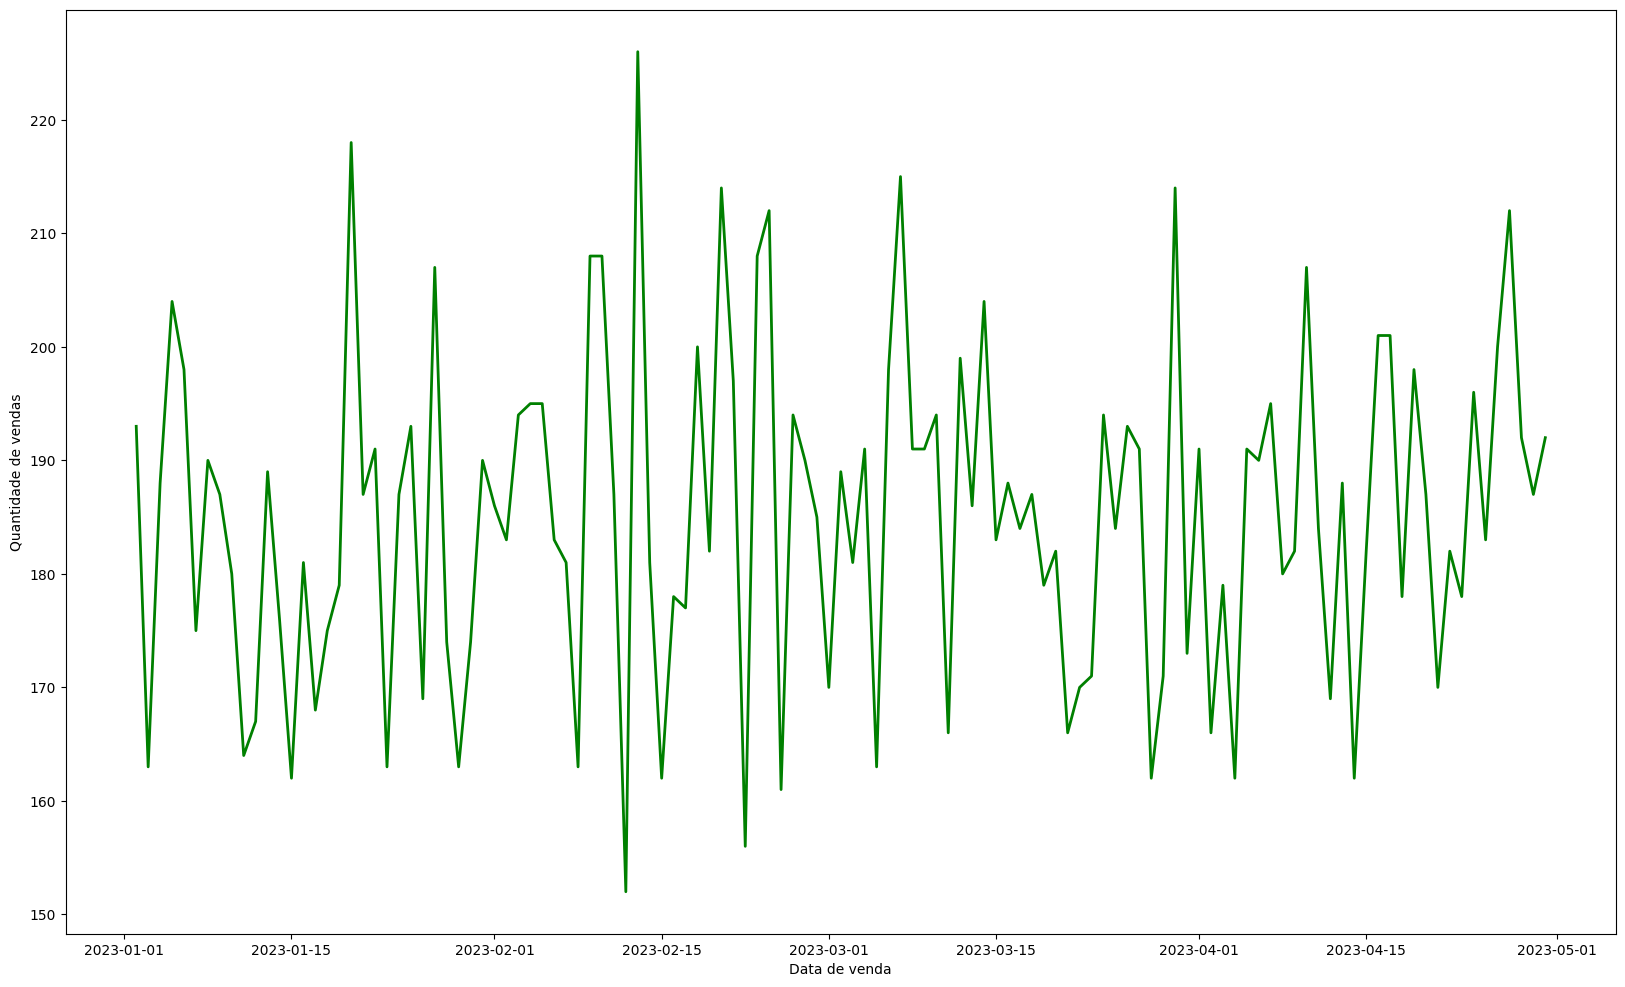

In [27]:
vendas_por_data = vendas_correto.groupby('Data').idcompra.nunique().reset_index()

fig = plt.figure(figsize=(20,12))

plt.xlabel('Data de venda')
plt.ylabel('Quantidade de vendas')
x = vendas_por_data['Data']
y = vendas_por_data['idcompra']
plt.plot(x,y, color='green', linewidth= '2');

Agrupando os dias para extrair por mês

In [28]:
# Criando uma nova coluna

vendas_correto['Mes'] = vendas_correto['Data'].dt.month
vendas_correto.head()

<ipython-input-28-cc96995cb179>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto['Mes'] = vendas_correto['Data'].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [29]:
vendas_correto.groupby('Mes').idcompra.nunique().sort_values(ascending=False)

,idcompra
Mes,
3,5590
4,5454
1,5309
2,5138


Importando a segunda base de dados

In [30]:
cliente = pd.read_excel('/content/cliente_varejo.xlsx')
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [31]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [32]:
#Analisando as colunas do database Cliente

cliente[['idade', 'renda']].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [33]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


Verificado que a coluna Renda está como int. Temos que transformar em float

In [34]:
cliente = cliente.astype({'renda':'float'})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


Realizando o join das tabelas

*   Utilizando o left join

In [35]:
vendas_clientes = vendas_correto.merge(cliente, how='left', on ='cliente_Log')
vendas_clientes.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


**4ª Premissa - Média de renda para cada tipo de canal**

In [36]:
agg_idcanal_renda = round(vendas_clientes.groupby('idcanalvenda')['renda'].agg('mean').sort_values(ascending=False).reset_index(),2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


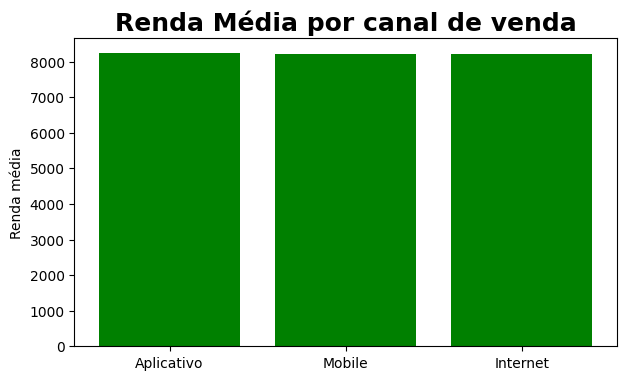

In [37]:
fig = plt.figure(figsize=(7,4))
plt.bar(agg_idcanal_renda['idcanalvenda'], agg_idcanal_renda['renda'], color='green')
plt.ylabel('Renda média')
plt.title('Renda Média por canal de venda', loc='center', fontsize=18, fontweight='bold', color='black');


**5 Premissa - Média de idade de clientes por bandeira**

In [38]:
agg_idade_bandeira = round(vendas_clientes.groupby('bandeira')['idade'].agg('mean').reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


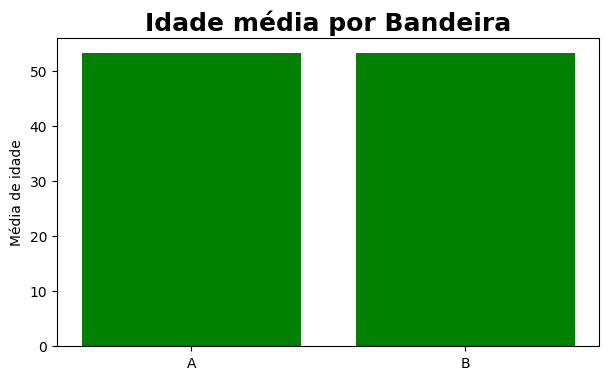

In [39]:
# Definindo o tamanho do gráfico
fig = plt.figure(figsize=(7,4))

plt.bar(agg_idade_bandeira['bandeira'], agg_idade_bandeira['idade'], color='green')
plt.ylabel('Média de idade')
plt.title('Idade média por Bandeira', loc='center', fontsize=18, fontweight='bold', color = 'black');

**Biblioteca plotly**

In [40]:
# %pip install plotly
# %pip install cufflinks
# %pip install chart-studio

**chart_studio.plotly**: Uma biblioteca usada para criar e compartilhar gráficos interativos. É a versão de Chart Studio do Plotly, que permite criar visualizações complexas e publicá-las na web.

**cufflinks**: Esta biblioteca conecta o Pandas diretamente ao Plotly, permitindo criar gráficos interativos a partir de dataframes do Pandas com facilidade. É especialmente útil para análise de dados rápida e visualização.

**plotly.graph_objects**: Parte do Plotly, que é uma biblioteca para criação de gráficos interativos em Python. O módulo graph_objects fornece uma interface para criar gráficos personalizados, permitindo um alto nível de controle sobre os elementos do gráfico.

**plotly.express**: Também parte do Plotly, esta biblioteca oferece uma interface de alto nível para criar visualizações de dados de forma rápida e simples. É mais fácil de usar do que graph_objects, mas com menos controle detalhado.

In [42]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

Gráfico Bandeira por média de idade

In [45]:
px.bar(agg_idade_bandeira, x ='bandeira', y='idade')

Vendas por data

In [47]:
px.line(vendas_por_data, x = 'Data', y = 'idcompra')

Preço por departamento

In [50]:
px.bar(agg_dept_preco, x ='Nome_Departamento', y = 'Preço_com_frete')